# Exploration

In [1]:
import pandas as pd


Stroke = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [2]:
Stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# keeping data pure
data = Stroke.copy()
print(f'Shape: {data.shape}')
print(data.info())

Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


* Note: we should changed ever_married to a 1-0 binary. 


In [5]:
print(f'Duplicates: {data.duplicated().sum()}\n')
print(f'NaN values:\n\
    id: {data["id"].isna().sum()}\n\
    age: {data["age"].isna().sum()}\n\
    hypertension: {data["hypertension"].isna().sum()}\n\
    heart disease: {data["heart_disease"].isna().sum()}\n\
    glucose: {data["avg_glucose_level"].isna().sum()}\n\
    bmi: {data["bmi"].isna().sum()}\n\
    stroke: {data["stroke"].isna().sum()}\n')
print(f'Number of people with missing bmi that had a stroke: {data[data["bmi"].isna()]["stroke"].sum()} out of 201')
print(f'Total number of people with stroke: {data["stroke"].sum()} out of 5110')

Duplicates: 0

NaN values:
    id: 0
    age: 0
    hypertension: 0
    heart disease: 0
    glucose: 0
    bmi: 201
    stroke: 0

Number of people with missing bmi that had a stroke: 40 out of 201
Total number of people with stroke: 249 out of 5110


The dataset is small, so I'd like to impute these values. (first we create a column to hold whether is being imputed)
* Mean (with regard to age/gender)


In [6]:
# creating a column to hold boolean for NaN values in BMI
data[["bmi_imputed"]]=0
data.loc[data["bmi"].isna(), "bmi_imputed"]=1
print(f'total number of columns being imputed in the bmi column: {data["bmi_imputed"].sum()}\n')
data.head()

total number of columns being imputed in the bmi column: 201



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imputed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [7]:
# change ever_married from string to an integer boolean value. 
M = {"Yes":1, "No":0}
data["ever_married"] = data["ever_married"].map(M)

# create a vector holding string stroke value. 
str_stroke = data["stroke"].map({1:"Stroke", 0:"No Stroke"})
str_hyp = data["hypertension"].map({0:"No Hypertension", 1:"Hypertension"})
str_heart = data["heart_disease"].map({0:"No Heart Disease", 1:"Heart Disease"})

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imputed
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [8]:
# Impute NaN values in bmi with mean after filtering age and gender. 
imp_mean_data = data.copy()
frame = data[data["bmi"].isna()][["id","gender","age"]]
for i in frame.index: 
    gender = frame["gender"][i]
    age = frame["age"][i]
    ID = frame["id"][i]
    imp_mean_data["bmi"][i] = round(data[(~data["bmi"].isna()) & (data["gender"]==gender) & (data["age"]==age)]["bmi"].mean(),1)

# check if there are still na values    
imp_mean_data[imp_mean_data["bmi"].isna()].head()

C:\Users\brett\AppData\Local\Temp\ipykernel_4676\3772224045.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_mean_data["bmi"][i] = round(data[(~data["bmi"].isna()) & (data["gender"]==gender) & (data["age"]==age)]["bmi"].mean(),1)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imputed
2030,38920,Male,0.48,0,0,0,children,Urban,73.02,NaN,Unknown,0,1


In [9]:
# taking care of single na value in bmi in the imp_mean_data. 
imp_mean_data["bmi"][2030] = round(data[(~data["bmi"].isna()) & (data["gender"]=="Male") & (data["age"]<1)]["bmi"].mean(),1)
imp_mean_data["bmi"][2030]

C:\Users\brett\AppData\Local\Temp\ipykernel_4676\2319528871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_mean_data["bmi"][2030] = round(data[(~data["bmi"].isna()) & (data["gender"]=="Male") & (data["age"]<1)]["bmi"].mean(),1)


18.4

# Univariate Analysis

In [10]:
print(f' number of unique id values: {data["id"].nunique()}\n')
imp_mean_data.describe(include = "all").T

 number of unique id values: 5110



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110.0,NaN,NaN,NaN,0.656164,0.475034,0.0,0.0,1.0,1.0,1.0
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,NaN,NaN,NaN,28.919276,7.730565,10.3,23.7,28.3,32.9,97.6


* Not sure if we should included children less than a year old. 
* More often then not people are in private industy, which makes sense with the population. 

In [11]:
# dropping id column for each dataset 
imp_mean_data.drop(["id"], axis = 1, inplace = True)


<AxesSubplot:xlabel='gender', ylabel='count'>

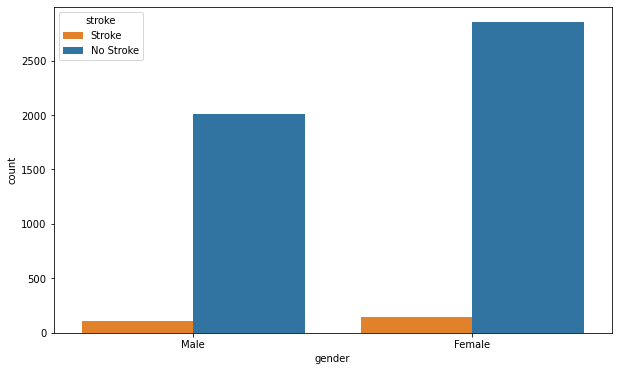

In [12]:
# look at distribution for gender excluding the single "other" 

plt.figure(figsize = (10,6))
sns.countplot(x = "gender", data = data[data["gender"]!= "Other"], hue = str_stroke, palette = ["C1", "C0"])

* More females in the study than males by a significant margin

age
Skew: -0.14


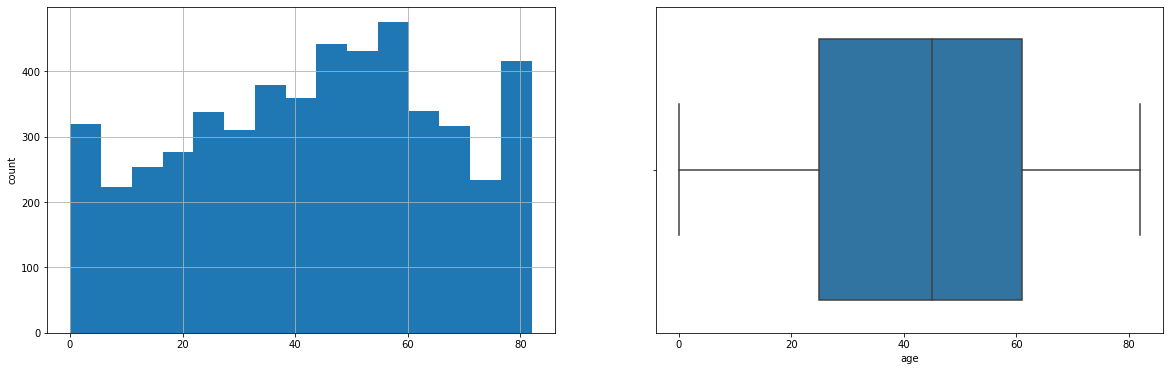

avg_glucose_level
Skew: 1.57


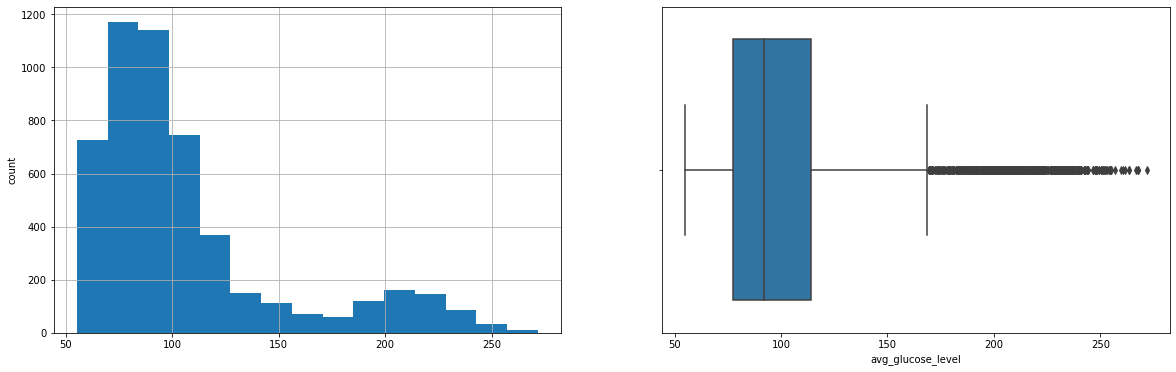

bmi
Skew: 1.05


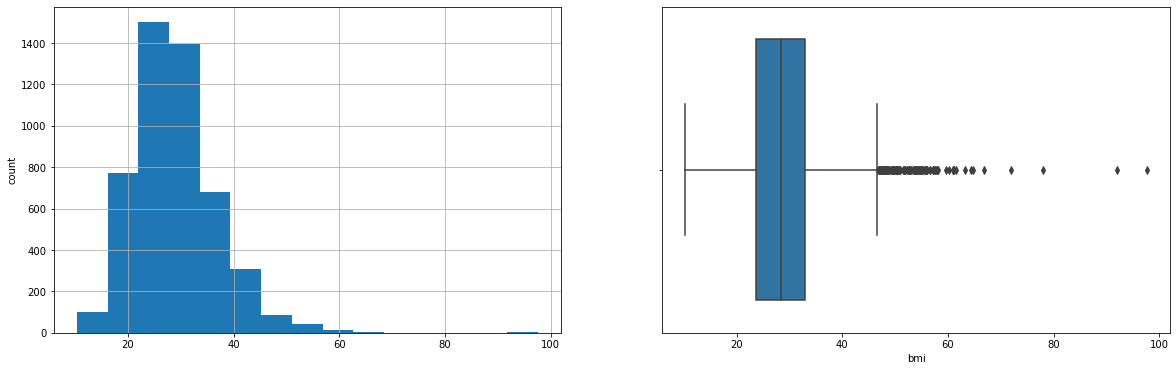

In [13]:
for col in ['age', 'avg_glucose_level', 'bmi']: 
    print(col)
    print(f'Skew: {round(imp_mean_data[col].skew(),2)}')
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)
    data[col].hist(bins = 15)
    plt.ylabel("count")
    plt.subplot(1,2,2)
    sns.boxplot(x = imp_mean_data[col])
    plt.show()

* Age doesn't look like a normal curve, but at least it isn't skewed to one side.  

* Avg glucose level is heavily skewed right with many outliers. This may be a precurser to a stroke if the stroke victims happen to be in the outlier section of this graph. 

* It looks like the bmi is pretty normal, outside of a few outliers. 


<AxesSubplot:xlabel='work_type', ylabel='count'>

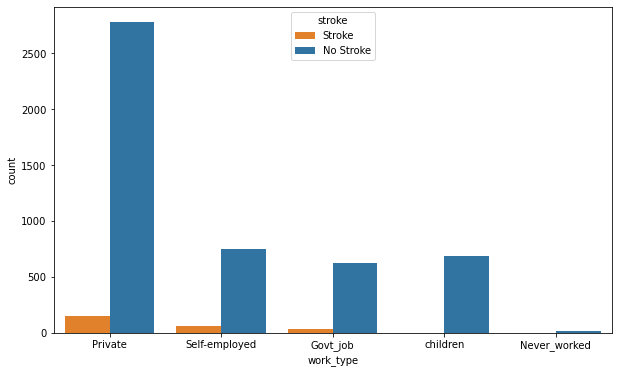

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = "work_type", hue = str_stroke, palette = ["C1", "C0"])

* the numbers look sufficiently scaled to each employment type. 

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

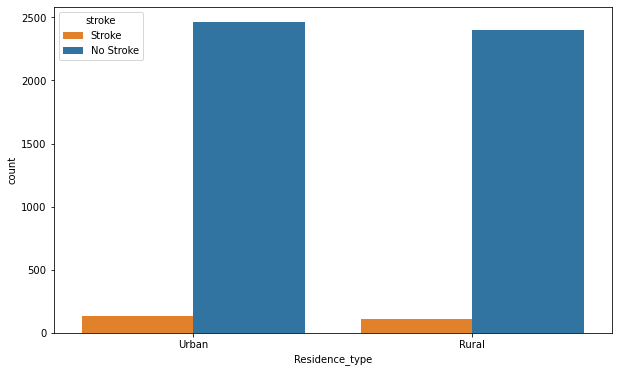

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = "Residence_type", hue = str_stroke, palette = ["C1", "C0"])

* residence doesn't seem to have an obvious effect on stroke susceptibility.

# Bivariate Analysis

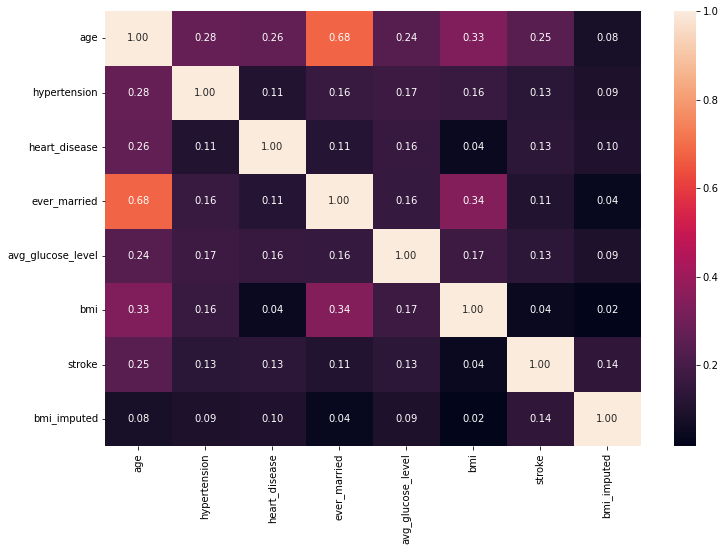

In [16]:
plt.figure(figsize = (12,8))
sns.heatmap(data = imp_mean_data.corr(), annot = True, fmt = '.2f')
plt.show()

* Here we are looking at any correlations between two variables and strokes. 
* It still looks like age is really the most reliable estimator. 
* It looks like heart disease and strokes are more prevalent in people with higher age and glucose. 
* it seems that the strongest correlation with whether or not you had a stroke is age. This makes sense to a degree; more stroke victims tend to be older. 
* all other categories outside of bmi seem to be relatively equal when we look at their correlations with whether they had a stroke. 
* The most obvious correlation is the age and whether or not they have been married. 
* It seems there is truth to the claim that once you land a spouse, you can let yourself go....the correlation is .34 XD
* Age seems to have the strongest correlation with each topic. It makes sense since, diseases, stress and weight all increase as you get older. 

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

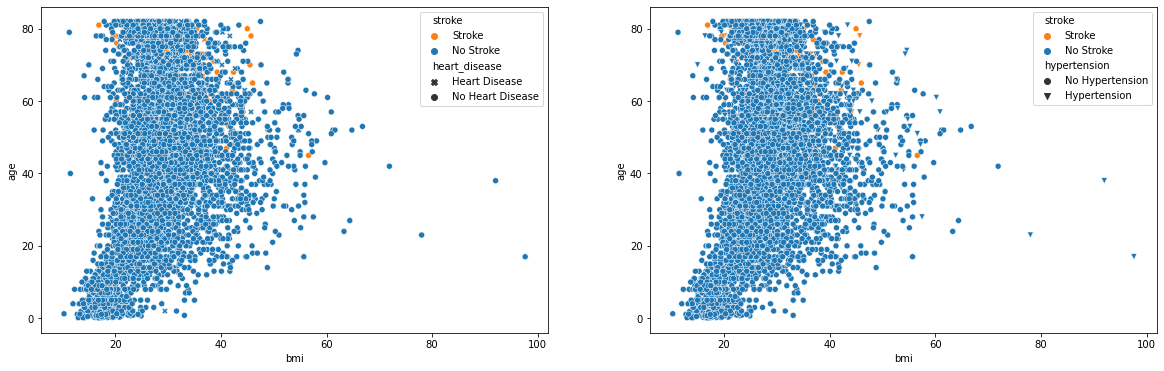

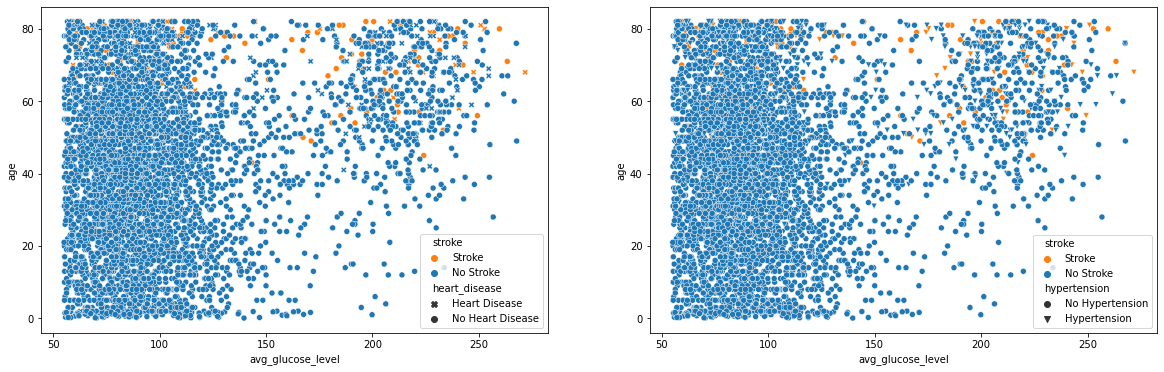

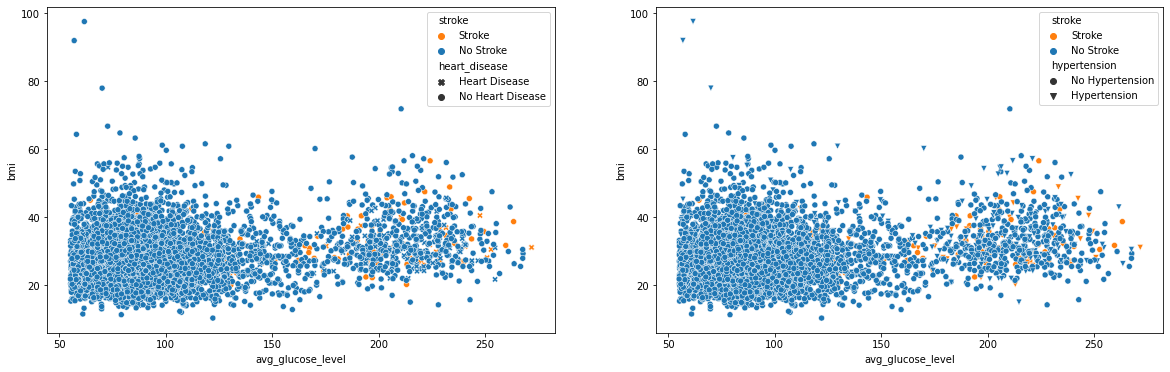

In [20]:
hyp = {"No Hypertension":'o', "Hypertension":'v'}
hea = {"No Heart Disease":'o', "Heart Disease":'X'}

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.scatterplot(data = imp_mean_data, x = "bmi", y = "age", hue = str_stroke, palette = ["C1", "C0"], style = str_heart, markers = hea)
plt.subplot(1,2,2)
sns.scatterplot(data = imp_mean_data, x = "bmi", y = "age", hue = str_stroke, palette = ["C1", "C0"], style = str_hyp, markers = hyp)
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.scatterplot(data = imp_mean_data, x = "avg_glucose_level", y = "age", hue = str_stroke, palette = ["C1", "C0"], style = str_heart, markers = hea)
plt.subplot(1,2,2)
sns.scatterplot(data = imp_mean_data, x = "avg_glucose_level", y = "age", hue = str_stroke, palette = ["C1", "C0"], style = str_hyp, markers = hyp)
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.scatterplot(data = imp_mean_data, x = "avg_glucose_level", y = "bmi", hue = str_stroke, palette = ["C1", "C0"], style = str_heart, markers = hea)
plt.subplot(1,2,2)
sns.scatterplot(data = imp_mean_data, x = "avg_glucose_level", y = "bmi", hue = str_stroke, palette = ["C1", "C0"], style = str_hyp, markers = hyp)
    
    

* age an davg glucose level seem to be the best predictors for hypertension.  Not necessarily the best predictor of stroke, but perhaps all three will be a decent predictor. 
* BMI seems to be a terrible predictor.  There is a lot of overlap in the data points. 